In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [43]:
df_health = pd.read_csv("Life Expectancy Data.csv")

In [44]:
df_health.shape


(2938, 22)

In [45]:
df_health.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [46]:
df_health.columns.values

array(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure',
       'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio',
       'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP',
       'Population', ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'], dtype=object)

The column seems to contain whitespaces in them so removing it

In [47]:
df_health.columns = df_health.columns.str.strip()

In [48]:
df_health.columns.values

array(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure',
       'Hepatitis B', 'Measles', 'BMI', 'under-five deaths', 'Polio',
       'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population',
       'thinness  1-19 years', 'thinness 5-9 years',
       'Income composition of resources', 'Schooling'], dtype=object)

## Explanation of Columns


* Adult Mortality - Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)
* infant deaths - Number of Infant Deaths per 1000 population
* Alcohol - Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)
* percentage expenditure - Expenditure on health as a percentage of Gross Domestic Product per capita(%).
* Hepatitis B - Hepatitis B (HepB) immunization coverage among 1-year-olds (%)
* Measles - Measles -> number of reported cases per 1000 population.
* BMI -> Average Body Mass Index of entire population
* under-five deaths -> Number of under-five deaths per 1000 population
* Polio -> Polio (Pol3) immunization coverage among 1-year-olds (%)
* Total expenditure -> General government expenditure on health as a percentage of total government expenditure (%)
* Diphtheria -> Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)
* HIV/AIDS -> Deaths per 1 000 live births HIV/AIDS (0-4 years)
* GDP -> Gross Domestic Product per capita (in USD)
* Population -> Population of the country
* thinness  1-19 years -> Prevalence of thinness among children and adolescents for Age 10 to 19 (% )
* thinness 5-9 years -> Prevalence of thinness among children for Age 5 to 9(%)
* Income composition of resources -> Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
* Schooling -> Number of years of Schooling(years)







In [49]:
df_health.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


#### Data Issues

* Infant death,Measles,under-five deaths data is per 1000 but we are having values > 1000. 
* Issue with percentage expenditure having value greater than 100 while the values should be in terms of percentage.

In [50]:
print("No of rows with wrong data in Infant death column is : ",df_health[df_health['infant deaths']>1000].shape[0])
print("No of rows with wrong data in Measles column is : ",df_health[df_health['Measles']>1000].shape[0])
print("No of rows with wrong data in under-five deaths column is : ",df_health[df_health['under-five deaths']>1000].shape[0])
print("No of rows with wrong data in percentage expenditure is : ",df_health[df_health['percentage expenditure']>1000].shape[0])

No of rows with wrong data in Infant death column is :  13
No of rows with wrong data in Measles column is :  525
No of rows with wrong data in under-five deaths column is :  16
No of rows with wrong data in percentage expenditure is :  413


<i> the above columns does not contain trusted data and the rows affected are lot so dropping these columns.

In [51]:
df_health.drop(labels=['infant deaths','Measles','under-five deaths','percentage expenditure'],inplace=True,axis=1)

In [52]:
df_health.columns.values

array(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'Alcohol', 'Hepatitis B', 'BMI', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population',
       'thinness  1-19 years', 'thinness 5-9 years',
       'Income composition of resources', 'Schooling'], dtype=object)

## Check for null values

In [53]:
df_health.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
Alcohol                            194
Hepatitis B                        553
BMI                                 34
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

In [54]:
# Converting to dictionary
null_col_dict = df_health.isnull().sum().to_dict()

In [55]:
null_col_dict = {k:v for k, v in null_col_dict.items() if v > 0}
null_col_dict = dict(sorted(null_col_dict.items(), key=lambda x:x[1]))
null_col_dict

{'Life expectancy': 10,
 'Adult Mortality': 10,
 'Polio': 19,
 'Diphtheria': 19,
 'BMI': 34,
 'thinness  1-19 years': 34,
 'thinness 5-9 years': 34,
 'Schooling': 163,
 'Income composition of resources': 167,
 'Alcohol': 194,
 'Total expenditure': 226,
 'GDP': 448,
 'Hepatitis B': 553,
 'Population': 652}

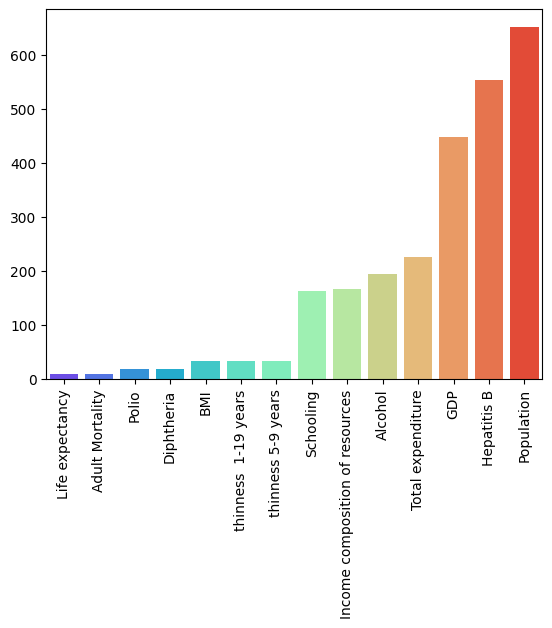

In [56]:
# Visualizing the data with null values
sns.barplot(x=list(null_col_dict.keys()),y=list(null_col_dict.values()),palette="rainbow")
plt.xticks(rotation=90)
plt.show()

In [57]:
df_health[null_col_dict.keys()].dtypes

Life expectancy                    float64
Adult Mortality                    float64
Polio                              float64
Diphtheria                         float64
BMI                                float64
thinness  1-19 years               float64
thinness 5-9 years                 float64
Schooling                          float64
Income composition of resources    float64
Alcohol                            float64
Total expenditure                  float64
GDP                                float64
Hepatitis B                        float64
Population                         float64
dtype: object

We need to check for outliers in the null columns and impute them accordingly.<br>
* If data has ouliers we will impute with median
* If data dont have outliers we will impute with mean

In [58]:
null_col_dict.keys()

dict_keys(['Life expectancy', 'Adult Mortality', 'Polio', 'Diphtheria', 'BMI', 'thinness  1-19 years', 'thinness 5-9 years', 'Schooling', 'Income composition of resources', 'Alcohol', 'Total expenditure', 'GDP', 'Hepatitis B', 'Population'])

****************************************************************************************************


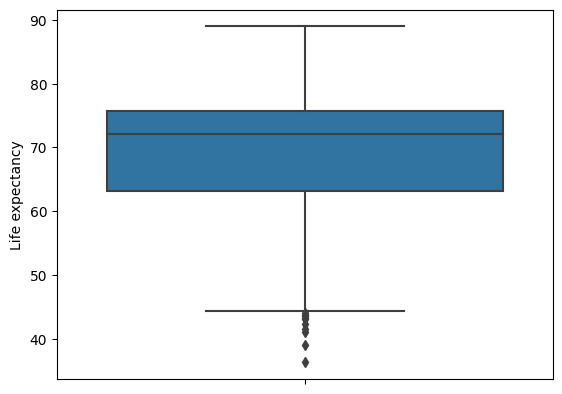

****************************************************************************************************


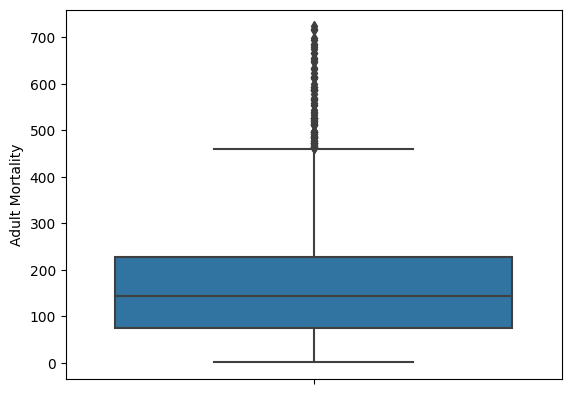

****************************************************************************************************


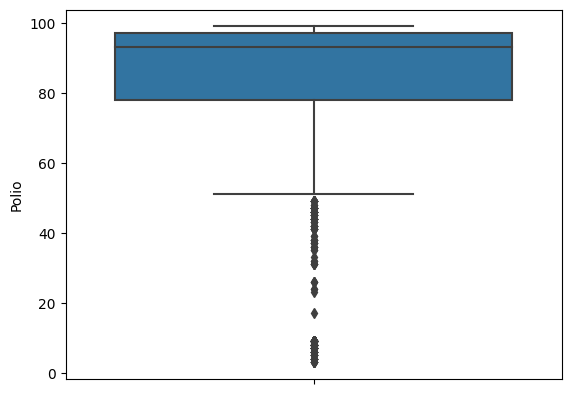

****************************************************************************************************


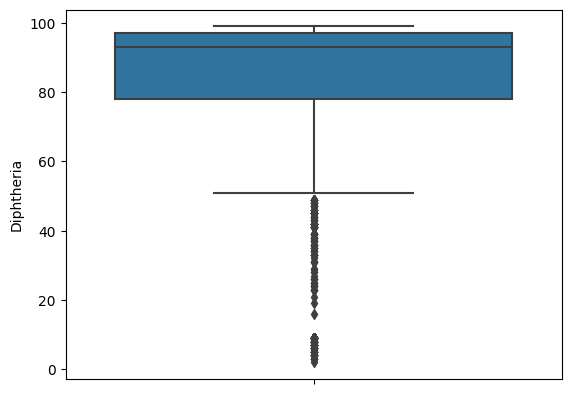

****************************************************************************************************


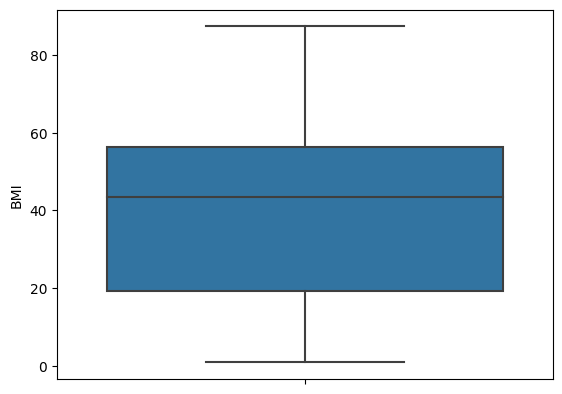

****************************************************************************************************


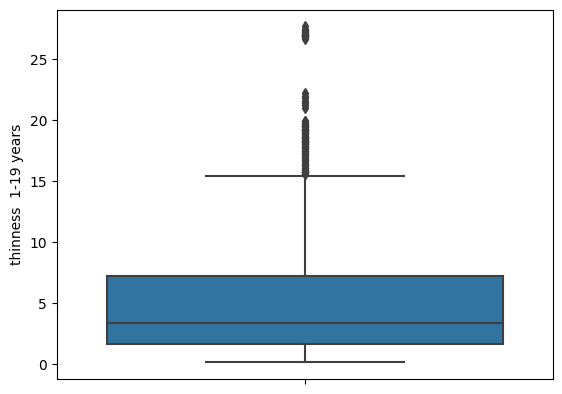

****************************************************************************************************


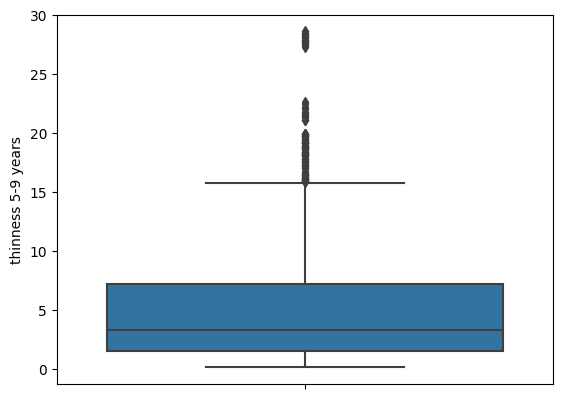

****************************************************************************************************


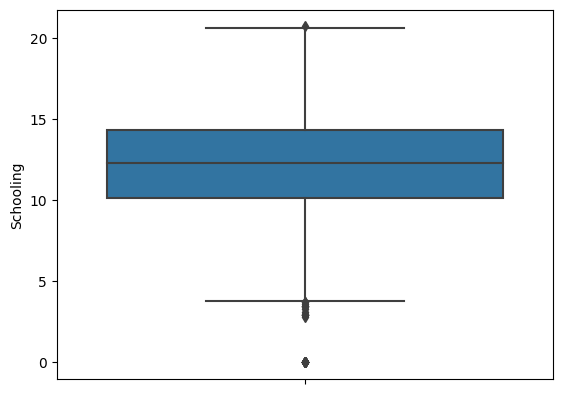

****************************************************************************************************


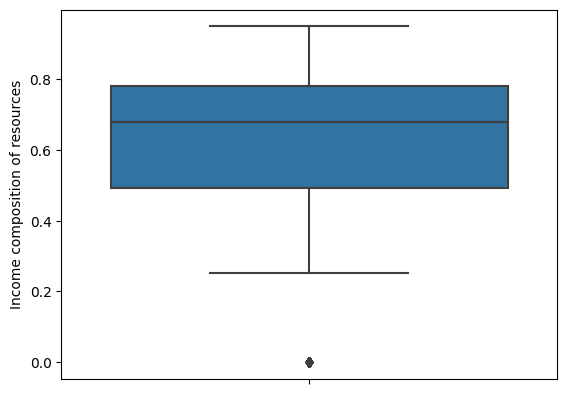

****************************************************************************************************


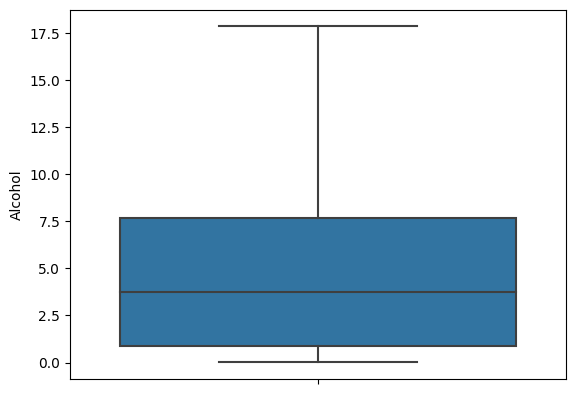

****************************************************************************************************


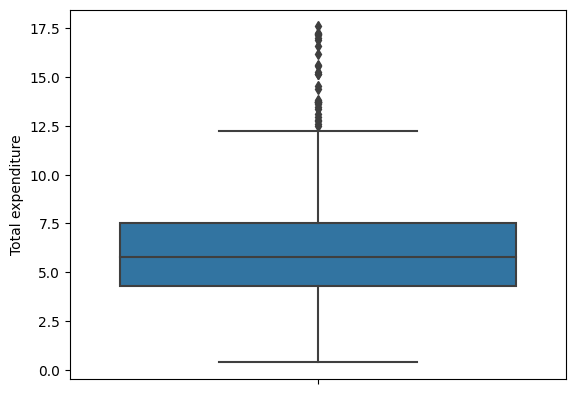

****************************************************************************************************


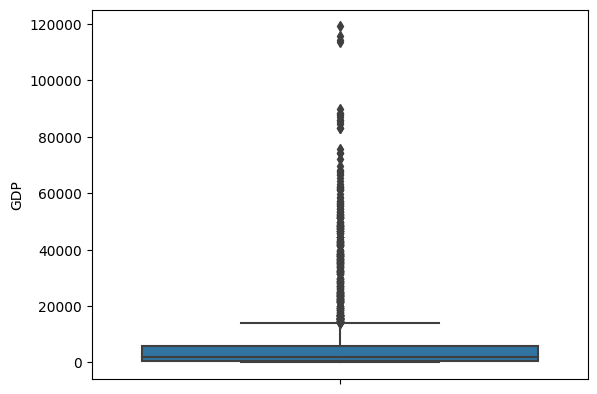

****************************************************************************************************


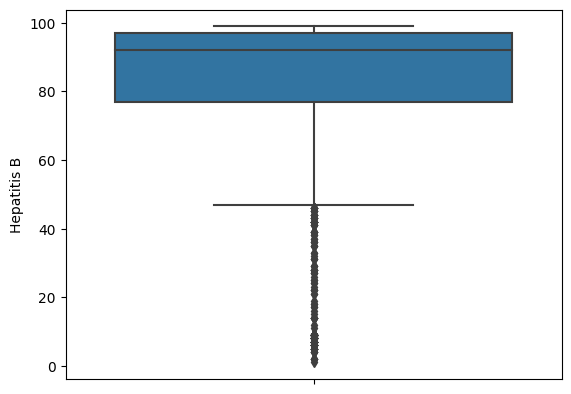

****************************************************************************************************


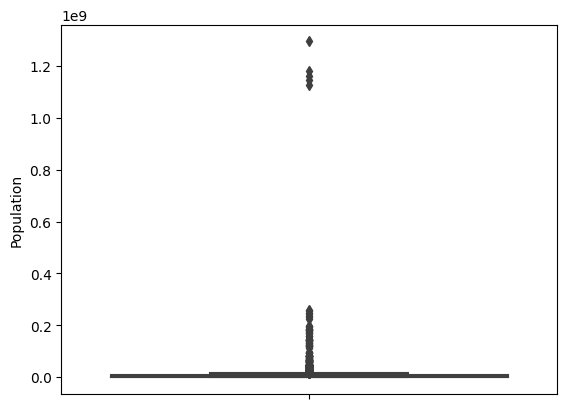

In [59]:
for i in null_col_dict.keys() :
    sns.boxplot(data=df_health,y=i)
    print('*'*100)
    plt.show()

All other columns which has null values except BMI and Alcohol have outliers in them so both of them will be imputed by mean and others will be by median.

In [60]:
for i in null_col_dict.keys():
    if (i=='BMI') or (i=="Alcohol"):
        temp_mean = df_health[i].mean()
        df_health[i].fillna(temp_mean,inplace=True)
    else :
        temp_median = df_health[i].median()
        df_health[i].fillna(temp_median,inplace=True)        

In [61]:
df_health.head()

,Country,Year,Status,Life expectancy,Adult Mortality,Alcohol,Hepatitis B,BMI,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,0.01,65.0,19.1,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,0.01,62.0,18.6,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,0.01,64.0,18.1,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,0.01,67.0,17.6,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,0.01,68.0,17.2,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [62]:
df_health['Status'] = df_health['Status'].map({'Developed' : 0 , 'Developing' : 1})

In [63]:
df_health.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
Alcohol                            0
Hepatitis B                        0
BMI                                0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

## Feature Selection

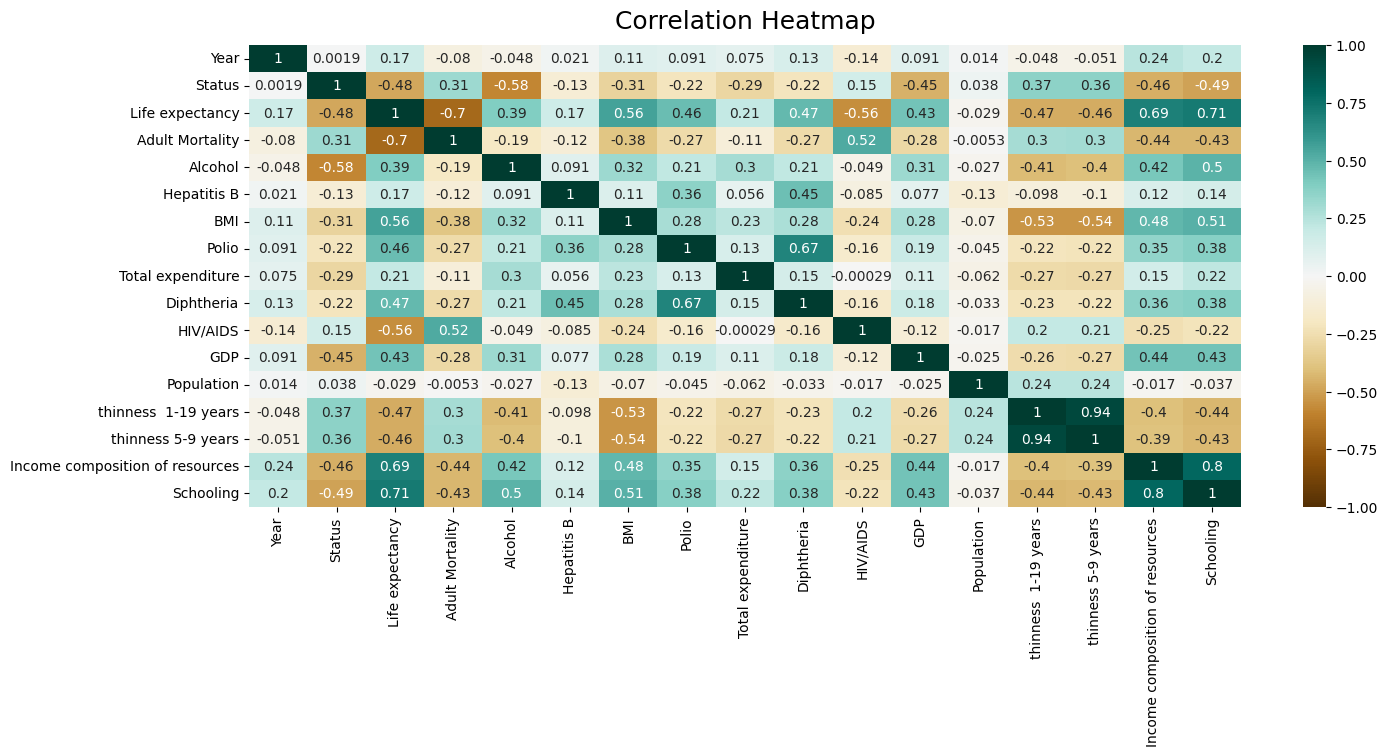

In [64]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df_health.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

 * Schooling and income composition of resources are highly correlated
 * thinness columns are also correlated

In [65]:
df_health.drop(labels=['Schooling','thinness 5-9 years'],axis=1,inplace=True)

Label encoding of Country column

In [66]:
# le=LabelEncoder()
# df_health['Country'] = le.fit_transform(df_health['Country'])
# df_health['Country'] = df_health['Country'].astype('int')


In [67]:
X = df_health.drop(labels=['Life expectancy','Year','Country'],axis=1)
year = df_health['Year']
y = df_health['Life expectancy']
country = df_health['Country']

In [68]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [69]:
feature_sel_model=SelectFromModel(Lasso(alpha=0.005))

In [70]:
feature_sel_model.fit(X,y)

SelectFromModel(estimator=Lasso(alpha=0.005))

In [71]:
feature_sel_model.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True])

In [72]:
cols=X.columns

In [73]:
# let's print the number of selected features

selected_feature=cols[feature_sel_model.get_support()]

In [74]:
selected_feature

Index(['Status', 'Adult Mortality', 'Alcohol', 'Hepatitis B', 'BMI', 'Polio',
       'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP',
       'thinness  1-19 years', 'Income composition of resources'],
      dtype='object')

## Feature Transformation

In [75]:
sc=StandardScaler()
def scale_transform(data):
    cols = data.columns
    for i in cols:
        if i in ['Country', 'Year', 'Status']:
            pass
        else :
            data[[i]] = sc.fit_transform(data[[i]])
    return data
        

In [76]:
df_health= scale_transform(df_health)

In [77]:
df_health.head()

,Country,Year,Status,Life expectancy,Adult Mortality,Alcohol,Hepatitis B,BMI,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,Income composition of resources
0,Afghanistan,2015,1,-0.445408,0.792119,-1.172958,-0.783807,-0.964715,-3.279423,0.931485,-0.735391,-0.323445,-0.453371,0.435183,2.815209,-0.737973
1,Afghanistan,2014,1,-0.981827,0.856601,-1.172958,-0.914281,-0.989810,-1.053699,0.939818,-0.862233,-0.323445,-0.451232,-0.183349,2.883439,-0.752600
2,Afghanistan,2013,1,-0.981827,0.832421,-1.172958,-0.827298,-1.014905,-0.882489,0.918987,-0.777671,-0.323445,-0.449799,0.398066,2.928926,-0.781853
3,Afghanistan,2012,1,-1.023899,0.864662,-1.172958,-0.696824,-1.040000,-0.668478,1.081463,-0.650830,-0.323445,-0.446924,-0.120968,2.974413,-0.815982
4,Afghanistan,2011,1,-1.055453,0.888843,-1.172958,-0.653333,-1.060076,-0.625675,0.810670,-0.608549,-0.323445,-0.492539,-0.134268,3.042643,-0.859862


### Model Building

In [78]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [79]:
df_health.columns = df_health.columns.str.replace(" ","_")

In [80]:
df_health.columns = df_health.columns.str.replace("/","_")
df_health.columns = df_health.columns.str.replace("-","_")

In [81]:
formula = "Life_expectancy ~ Status+Adult_Mortality+Alcohol+Hepatitis_B+BMI+Polio+Total_expenditure+Diphtheria+HIV_AIDS+GDP+Population+thinness__1_19_years+Income_composition_of_resources"
group_var = "Year"
re_formula = f"0 + {group_var}"

In [ ]:
# fit the mixed effects model
model = sm.MixedLM.from_formula(formula=formula, groups=df_health[group_var], re_formula=re_formula, data=df_health)
result = model.fit()

In [83]:
# print the model summary
print(result.summary())

                   Mixed Linear Model Regression Results
Model:                  MixedLM     Dependent Variable:     Life_expectancy
No. Observations:       2938        Method:                 REML           
No. Groups:             16          Scale:                  0.2083         
Min. group size:        183         Log-Likelihood:         -1909.2887     
Max. group size:        193         Converged:              No             
Mean group size:        183.6                                              
---------------------------------------------------------------------------
                                Coef.  Std.Err.    z    P>|z| [0.025 0.975]
---------------------------------------------------------------------------
Intercept                        0.158    0.027   5.947 0.000  0.106  0.210
Status                          -0.191    0.030  -6.299 0.000 -0.250 -0.132
Adult_Mortality                 -0.279    0.011 -25.358 0.000 -0.301 -0.258
Alcohol                        

## Library linearmodels

In [90]:
from linearmodels.panel import PanelOLS
from linearmodels.panel import RandomEffects

In [85]:
data = df_health.set_index(["Country","Year"])

In [87]:
data.columns

Index(['Status', 'Life_expectancy', 'Adult_Mortality', 'Alcohol',
       'Hepatitis_B', 'BMI', 'Polio', 'Total_expenditure', 'Diphtheria',
       'HIV_AIDS', 'GDP', 'Population', 'thinness__1_19_years',
       'Income_composition_of_resources'],
      dtype='object')

In [89]:
dependent_variable = 'Life_expectancy'
independent_variables = ['Status', 'Adult_Mortality', 'Alcohol',
       'Hepatitis_B', 'BMI', 'Polio', 'Total_expenditure', 'Diphtheria',
       'HIV_AIDS', 'GDP', 'Population', 'thinness__1_19_years',
       'Income_composition_of_resources']

In [94]:
# Define the panel data model (with fixed effects)
model = PanelOLS(data[dependent_variable], data[independent_variables], entity_effects=True, time_effects=True,drop_absorbed=True)
# Fit the model using maximum likelihood estimation
result = model.fit(cov_type='clustered', cluster_entity=True)
# result = model.fit()

In [95]:
# Print the model summary
print(result.summary)

                          PanelOLS Estimation Summary                           
Dep. Variable:        Life_expectancy   R-squared:                        0.1786
Estimator:                   PanelOLS   R-squared (Between):              0.1944
No. Observations:                2938   R-squared (Within):               0.2404
Date:                Mon, Mar 27 2023   R-squared (Overall):              0.1970
Time:                        17:11:14   Log-likelihood                    670.18
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      49.243
Entities:                         193   P-value                           0.0000
Avg Obs:                       15.223   Distribution:                 F(12,2718)
Min Obs:                       1.0000                                           
Max Obs:                       16.000   F-statistic (robust):             7.5153
                            

In [98]:
# Define the random effects model
model_re = RandomEffects(data[dependent_variable], data[independent_variables])

# Fit the random effects model using maximum likelihood estimation
# result_re = model_re.fit(cov_type='clustered', cluster_entity=True)
result_re =  model_re.fit()

# Print the random effects model summary
print(result_re.summary)

                        RandomEffects Estimation Summary                        
Dep. Variable:        Life_expectancy   R-squared:                        0.4204
Estimator:              RandomEffects   R-squared (Between):              0.6474
No. Observations:                2938   R-squared (Within):               0.2835
Date:                Mon, Mar 27 2023   R-squared (Overall):              0.6206
Time:                        17:25:43   Log-likelihood                   -242.70
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      163.22
Entities:                         193   P-value                           0.0000
Avg Obs:                       15.223   Distribution:                 F(13,2925)
Min Obs:                       1.0000                                           
Max Obs:                       16.000   F-statistic (robust):             163.22
                            